In [2]:
#!pip install opendatasets
##data is downloaded from "/kaggle/input/pubmed-abstracts/pubmed_abstracts.csv"

In [15]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [9]:
# basic cleanup function
def preprocess_tex(text):
    text = text.str.lower() # lowercase
    text = text.str.replace(r"[^\w\s]", '', regex=True) # remove non-alphanumeric excluding spaces

    text = text.str.replace(r"\#","", regex=True) # replaces hashtags
    text = text.str.replace(r"http\S+","URL", regex=True)  # remove URL addresses
    text = text.str.replace(r"@","", regex=True)
    text = text.str.replace("\s{2,}", "", regex=True)
    return text

In [3]:
df=pd.read_csv('../data/raw/pubmed_abstracts.csv', index_col=0)

In [22]:
df.head()

,deep_learning,covid_19,human_connectome,virtual_reality,brain_machine_interfaces,electroactive_polymers,pedot_electrodes,neuroprosthetics,deep_learning_links,covid_19_links,human_connectome_links,virtual_reality_links,brain_machine_interfaces_links,electroactive_polymers_links,pedot_electrodes_links,neuroprosthetics_links
0,(['Magnetic resonance spectroscopic imaging (M...,(['As cancer researchers shutter their labs to...,"(['For decades, it has been largely unknown to...",(['To evaluate the differences between walking...,(['All neural information systems (NIS) rely o...,(['A mediatorless glucose biosensor was develo...,(['In the growing field of brain-machine inter...,(['The heart continuously and cyclically commu...,https://www.ncbi.nlm.nih.gov/pubmed/31352337,https://www.ncbi.nlm.nih.gov/pubmed/32234716,https://www.ncbi.nlm.nih.gov/pubmed/25420254,https://www.ncbi.nlm.nih.gov/pubmed/30653920,https://www.ncbi.nlm.nih.gov/pubmed/27669264,https://www.ncbi.nlm.nih.gov/pubmed/22967516,https://www.ncbi.nlm.nih.gov/pubmed/28266832,https://www.ncbi.nlm.nih.gov/pubmed/31051293
1,(['Existing deep convolutional neural networks...,"(['In December 2019, the outbreak of pneumonia...",(['While resting-state functional magnetic res...,(['Potentially painful invasive procedures are...,(['Independent component analysis (ICA) as a p...,(['Hierarchical structures of hybrid materials...,(['High-performance transparent and flexible t...,(['This study was aimed at investigating the i...,https://www.ncbi.nlm.nih.gov/pubmed/31329133,https://www.ncbi.nlm.nih.gov/pubmed/32235387,https://www.ncbi.nlm.nih.gov/pubmed/25589760,https://www.ncbi.nlm.nih.gov/pubmed/30679136,https://www.ncbi.nlm.nih.gov/pubmed/27631789,https://www.ncbi.nlm.nih.gov/pubmed/23545560,https://www.ncbi.nlm.nih.gov/pubmed/28937733,https://www.ncbi.nlm.nih.gov/pubmed/30655080
2,(['Deep learning techniques have been increasi...,"([], 'Treating COVID-19 with Chloroquine.')",(['This paper presents the experimental evalua...,"([""Early exposure to radiological cross-sectio...","([], 'Brain-machine interfaces: assistive, tho...",(['An analytical method was researched for the...,"(['In this investigation, we employed a novel ...",(['Low-intensity focused ultrasound stimulatio...,https://www.ncbi.nlm.nih.gov/pubmed/31329567,https://www.ncbi.nlm.nih.gov/pubmed/32236562,https://www.ncbi.nlm.nih.gov/pubmed/25624185,https://www.ncbi.nlm.nih.gov/pubmed/30697948,https://www.ncbi.nlm.nih.gov/pubmed/27654684,https://www.ncbi.nlm.nih.gov/pubmed/22265536,https://www.ncbi.nlm.nih.gov/pubmed/28825302,https://www.ncbi.nlm.nih.gov/pubmed/30952150
3,(['The original article unfortunately containe...,"(['18 years ago, in 2002, the world was astoni...","([], ""For Microscopy special issue on 'connect...",(['To investigate the effects of various rehab...,(['While motor-imagery based brain-computer in...,(['The antibacterial properties of a nanocompo...,(['Great progress has been made on the cyclabi...,(['Our brain has developed a specific system t...,https://www.ncbi.nlm.nih.gov/pubmed/31350607,https://www.ncbi.nlm.nih.gov/pubmed/32235085,https://www.ncbi.nlm.nih.gov/pubmed/25652424,https://www.ncbi.nlm.nih.gov/pubmed/30686327,https://www.ncbi.nlm.nih.gov/pubmed/27578310,https://www.ncbi.nlm.nih.gov/pubmed/22091864,https://www.ncbi.nlm.nih.gov/pubmed/28306233,https://www.ncbi.nlm.nih.gov/pubmed/30685486
4,(['The most common applications of artificial ...,"([], 'Covid-19: Doctors still at ""considerable...",(['A central feature of theories of spatial na...,(['Virtual reality (VR) is a technology that a...,(['The disorders of consciousness refer to cli...,(['The metal-mediated self-assembly of coordin...,(['With the aim of a reliable biosensing exhib...,"([""Electrophysiological techniques have improv...",https://www.ncbi.nlm.nih.gov/pubmed/31348869,https://www.ncbi.nlm.nih.gov/pubmed/32234713,https://www.ncbi.nlm.nih.gov/pubmed/25601828,https://www.ncbi.nlm.nih.gov/pubmed/30668519,https://www.ncbi.nlm.nih.go

In [11]:
cols = ['deep_learning', 'covid_19', 
        'human_connectome','virtual_reality', 
        'brain_machine_interfaces', 'electroactive_polymers', 
        'pedot_electrodes', 'neuroprosthetics']

df = df[cols].apply(lambda x: preprocess_tex(x))

In [14]:
label_names = []

dl = df.deep_learning.dropna()
label_names += len(dl) * ["deep_learning"]
covid_19 = df.covid_19.dropna()
label_names += len(covid_19) * ["covid_19"]
human_connectome = df.human_connectome.dropna()
label_names += len(human_connectome) * ["human_connectome"]
virtual_reality = df.virtual_reality.dropna()
label_names += len(virtual_reality) * ["virtual_reality"]
brain_machine_interfaces = df.brain_machine_interfaces.dropna()
label_names += len(brain_machine_interfaces) * ["brain_machine_interfaces"]
electroactive_polymers = df.electroactive_polymers.dropna()
label_names += len(electroactive_polymers) * ["electroactive_polymers"]
pedot_electrodes = df.pedot_electrodes.dropna()
label_names += len(pedot_electrodes) * ["pedot_electrodes"]
neuroprosthetics = df.neuroprosthetics.dropna()
label_names += len(neuroprosthetics) * ["neuroprosthetics"]


text = list(pd.concat([dl, covid_19, human_connectome, virtual_reality, \
    brain_machine_interfaces, electroactive_polymers, pedot_electrodes, neuroprosthetics]))#.unique())

df = pd.DataFrame({"text" : text, "label_name" : label_names})


# create a new digital column matching labels
labels = {"deep_learning": 0 , "covid_19": 1, \
    "human_connectome": 2, "virtual_reality": 3, \
        "brain_machine_interfaces": 4, "electroactive_polymers": 5,\
            "pedot_electrodes": 6, "neuroprosthetics": 7}

df['label'] = df['label_name'].apply(lambda x: labels[x])

# removing duplicates
df = df.drop_duplicates(['text','label_name']).reset_index(drop=True)
df

,text,label_name,label
0,magnetic resonance spectroscopic imaging mrsi ...,deep_learning,0
1,existing deep convolutional neural networks cn...,deep_learning,0
2,deep learning techniques have been increasingl...,deep_learning,0
3,the original article unfortunately contained a...,deep_learning,0
4,the most common applications of artificial int...,deep_learning,0
...,...,...,...
44374,neurological disorders disrupt the equilibrium...,neuroprosthetics,7
44375,the first decade and a half of the twentyfirst...,neuroprosthetics,7
44376,stimuli from different sensory modalities occu...,neuroprosthetics,7
44377,studying body representations in the brain hel...,neuroprosthetics,7


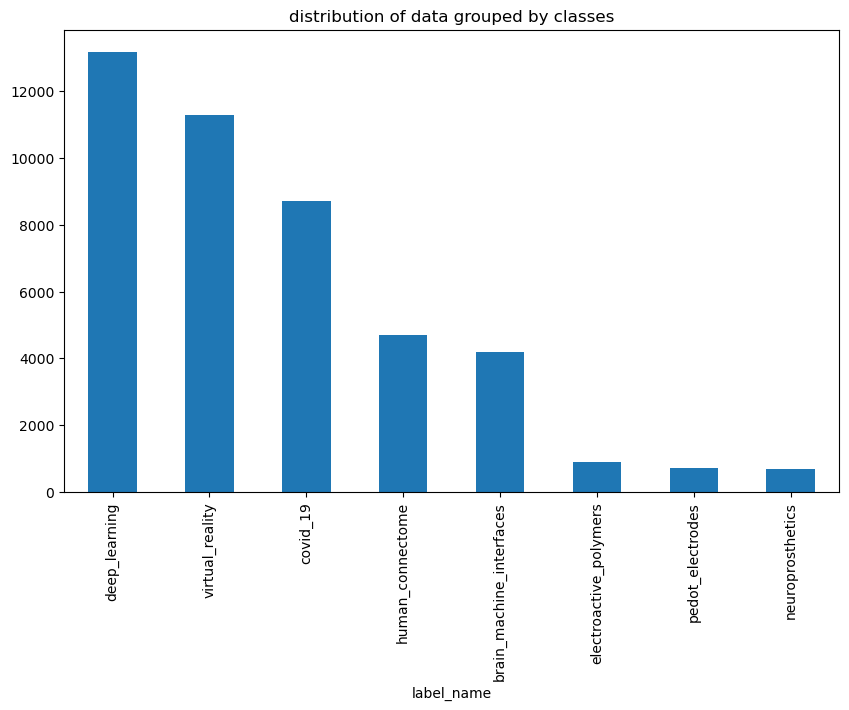

In [17]:
df['label_name'].value_counts().plot(kind='bar', title="distribution of data grouped by classes",figsize=(10, 6))
plt.show()